1. Defining Problem Statement and
Analysing basic metrics

Aerofit's market research team aims to understand the target audience for each treadmill type to enhance customer recommendations. Descriptive analytics and contingency tables will be used to create customer profiles and analyze customer characteristics' impact.

To enhance Aerofit's treadmill recommendations, we can consider the following key questions:

1. What are the age, gender, income, and location of customers for each treadmill type?

2. Which features (e.g., size, price, tech) are prioritized by different demographics?

3. How and where do customers prefer to buy these treadmills?

4. What is the probability of a customer buying a specific treadmill?, etc.

Dataset column info:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week


In [1]:
# Importing the necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1.1 Observations on the shape of data, data types of all the
attributes, conversion of categorical attributes to 'category'
(If required), missing value detection, statistical summary

In [2]:
# Loading/Reading the csv
link = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
df = pd.read_csv(link)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [3]:
df.shape

(180, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


2. Missing Value Detection. No missing values found

In [7]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

2. Non-Graphical Analysis: Value counts and unique attributes ​​

In [8]:
print(f"Unique counts: ", {df["MaritalStatus"].nunique()})
df["MaritalStatus"].value_counts()

Unique counts:  {2}


MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [9]:
print(f"Unique counts: ", {df["Product"].nunique()})
df["Product"].value_counts()

Unique counts:  {3}


Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [10]:
print(f"Unique counts: ", {df["Gender"].nunique()})
df["Gender"].value_counts()

Unique counts:  {2}


Gender
Male      104
Female     76
Name: count, dtype: int64

In [11]:
print(f"Unique counts: ", {df["Education"].nunique()})
df["Education"].value_counts()

Unique counts:  {8}


Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [12]:
print(f"Unique counts: ", {df["Usage"].nunique()})
df["Usage"].value_counts()

Unique counts:  {6}


Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [13]:
print(f"Unique counts: ", {df["Fitness"].nunique()})
df["Fitness"].value_counts()

Unique counts:  {5}


Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [14]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

3 .Visual Analysis - Univariate & Bivariate:

  1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis
  2. For categorical variable(s): Boxplot
  3. For correlation: Heatmaps, Pairplots

3.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

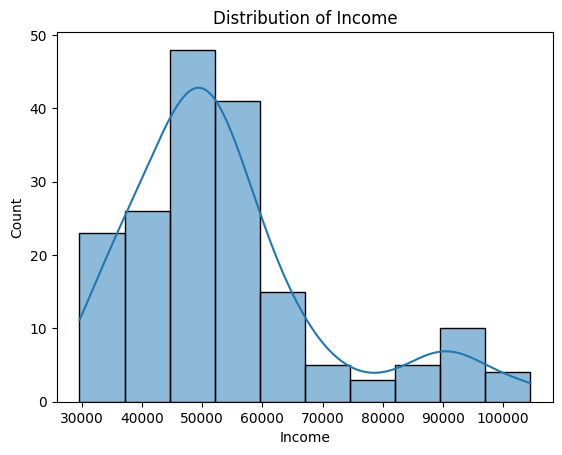

In [15]:
sns.histplot(data = df, x = df["Income"], kde = True, bins = 10)
plt.title("Distribution of Income")
plt.show()

Insights = Distribution of income is right skewed most people income ranges from 30k to 60k

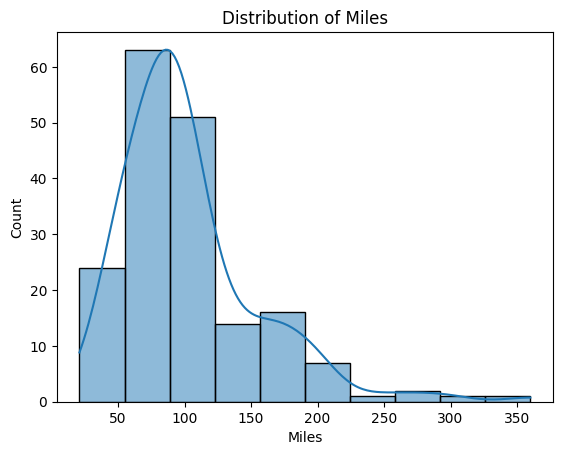

In [16]:
sns.histplot(data = df, x = df["Miles"], kde = True, bins = 10)
plt.title("Distribution of Miles")
plt.show()

Insights: Distribution of Miles is right skewed very few people are going to use tredmill for more than 200 miles

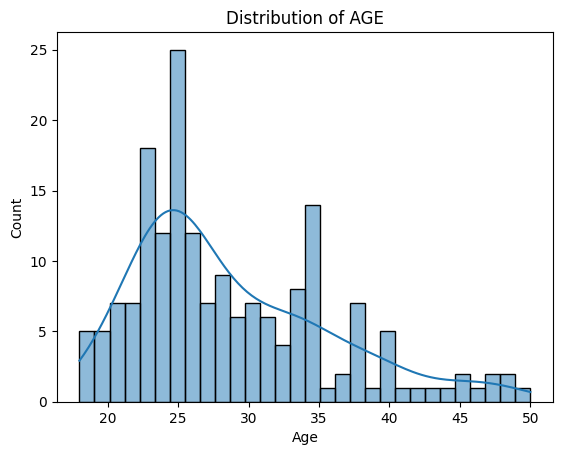

In [17]:
# Distribution of AGE with histplot
sns.histplot(data = df, x = df["Age"], kde = True, bins = 30)
plt.title("Distribution of AGE")
plt.show()

Insights: Distribution of age looks right skewed most of people in data set are of age range between 20 to 35

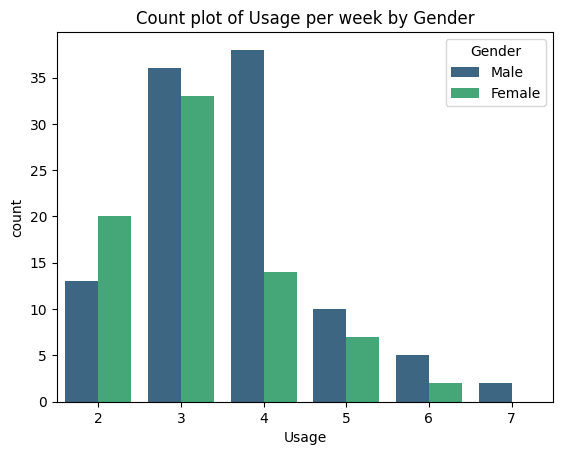

In [18]:
sns.countplot(x='Usage', data=df, hue = "Gender", palette= "viridis")
plt.title('Count plot of Usage per week by Gender')
plt.show()

Insights:count of usage is right skewed while considering male to female ration in the data set usage are same between both gender

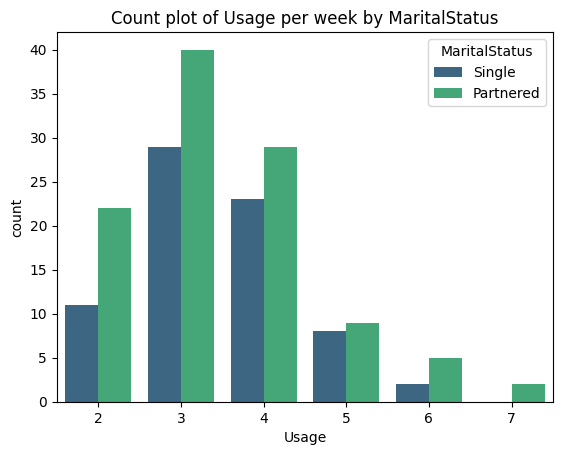

In [19]:
sns.countplot(x='Usage', data=df, hue = "MaritalStatus", palette= "viridis")
plt.title('Count plot of Usage per week by MaritalStatus')
plt.show()

Insights: Usage by marital status looks equal considering ration of single to partenered.

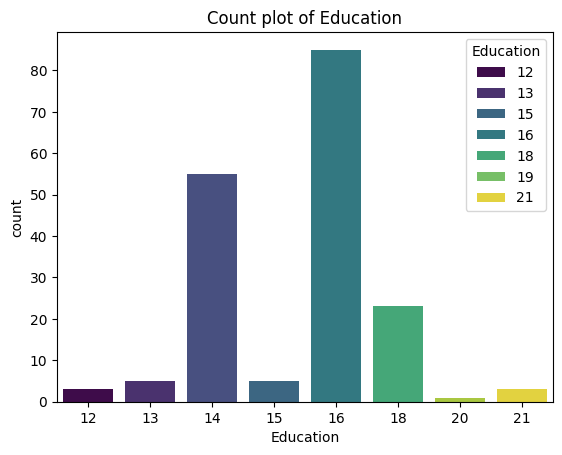

In [20]:
sns.countplot(x='Education', data=df, hue = "Education", palette= "viridis")
plt.title('Count plot of Education')
plt.show()

Insights: Eduction of people seems irrelenvant feature

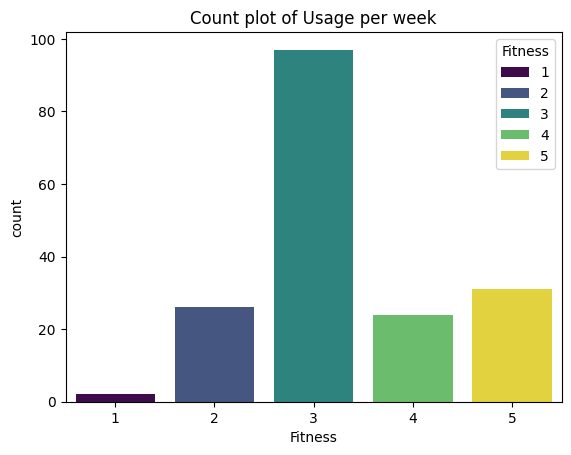

In [21]:
sns.countplot(x='Fitness', data=df, hue = "Fitness", palette= "viridis")
plt.title('Count plot of Usage per week')
plt.show()

Insights: Most of of the people prefer usage of tredmill 3 times a week.

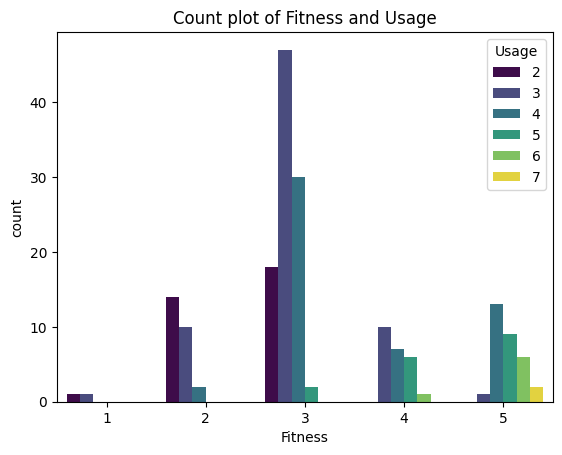

In [22]:
sns.countplot(x='Fitness', data=df, hue = "Usage", palette= "viridis")
plt.title('Count plot of Fitness and Usage')
plt.show()

Insights: people who rated 5 in fitness score are only people planning to use tredmill 7 times a week.

3.2 For categorical variable(s): Boxplot

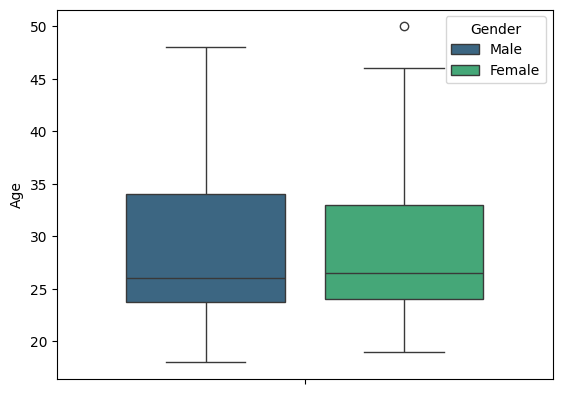

In [23]:
sns.boxplot(y = df["Age"], hue = df["Gender"], gap = 1.8,  palette= "viridis")
plt.show()

Insights: there is not significant difference between age of people and gender in data set

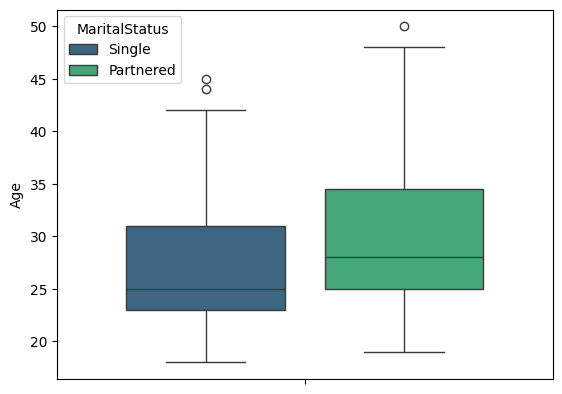

In [24]:
sns.boxplot(y = df["Age"], hue = df["MaritalStatus"], gap = 1.8,  palette= "viridis")
plt.show()

Insights: avg Age of Partnered individual is more than single indivisual

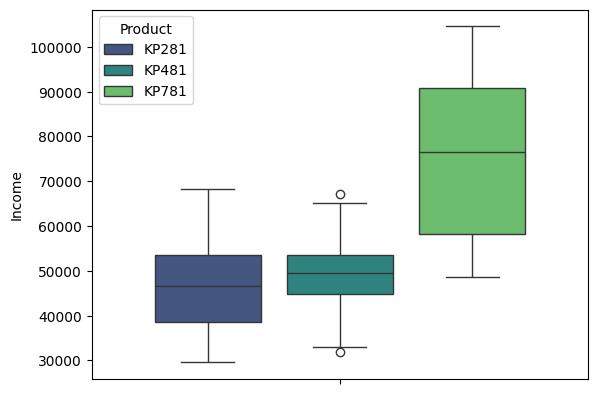

In [25]:
sns.boxplot(y = df["Income"], hue = df["Product"], gap = 1.8,  palette= "viridis")
plt.show()

Insights: Box plot show indivisual with high income prefer buying KP781 model and indivisual with income 30 k to 70k preffer buying KP281 or KP481 with some excpetions.

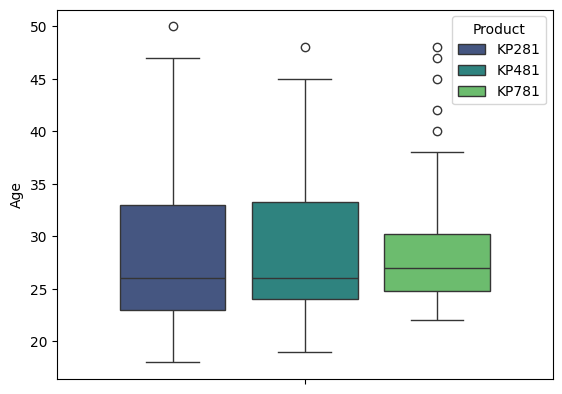

In [26]:
sns.boxplot(y = df["Age"], hue = df["Product"], gap = 1.8,  palette= "viridis")
plt.show()

Insights: Looking at the count of age of people and their product preferance above boxplot does not show any significant difference in purchase of product by age.

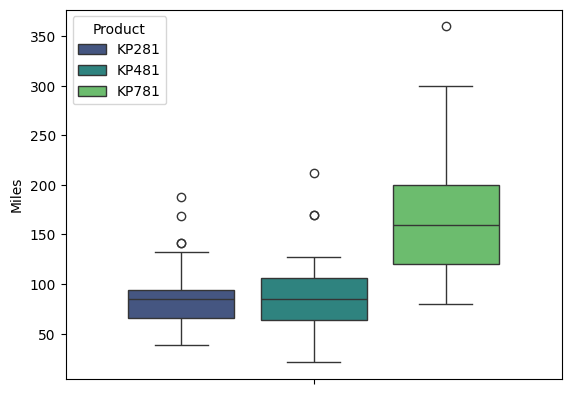

In [27]:
sns.boxplot(y = df["Miles"], hue = df["Product"], gap = 1.8,  palette= "viridis")
plt.show()

Insights: Indivisual who are planning to run avg miles greater than 150 prefer buying KP781 and people who are planning to to run avg of 80 miles per week prefer KP481 or KP281 there is no significant difference between these.

Some other plots Fitness vs Miles:

*   Binning the miles columns
*   Ploting against Fitness





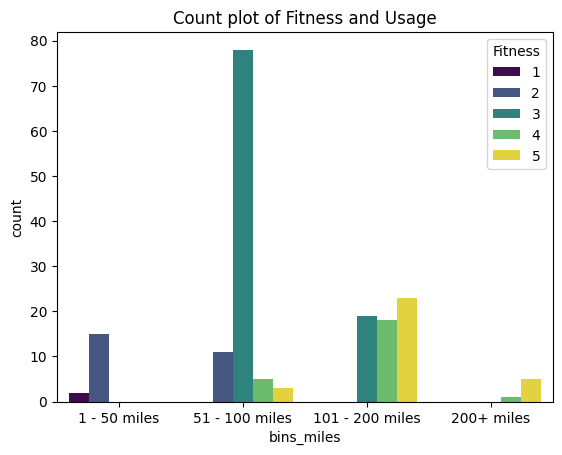

In [28]:
# Labeling the bins
bin_labels = ['1 - 50 miles', '51 - 100 miles', '101 - 200 miles', '200+ miles']
bin_edges = [-np.inf, 50, 100, 200, np.inf]
bins_with_labels = pd.cut(df["Miles"], labels=bin_labels, bins = bin_edges)
df["bins_miles"] = bins_with_labels
sns.countplot(x='bins_miles', data=df, hue = "Fitness", palette= "viridis")
plt.title('Count plot of Fitness and Usage')
plt.show()


Insights: Those who are planning to run less than 50 scored themselves fitness score of 1 or 2 and those planning to run 200+ miles rated the fitness score of 4 or 5

Miles vs Fitness

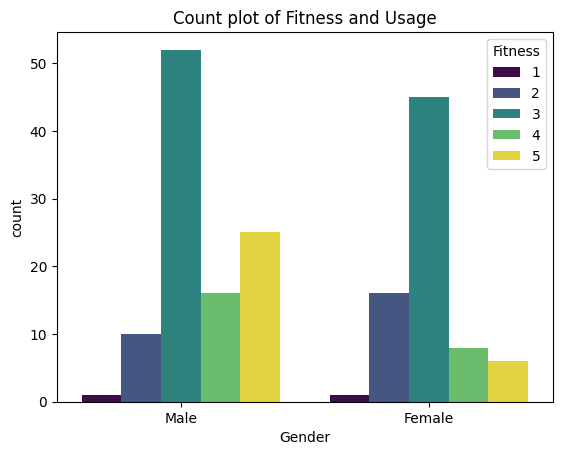

In [29]:
sns.countplot(x='Gender', data=df, hue = "Fitness", palette= "viridis")
plt.title('Count plot of Fitness and Usage')
plt.show()

Insights: Less number of Females Scored 4 or 5 Fitness score compared to male. Avg fitness score is 3 for both the gender.

Binning the data : Binning the Age and Income columns

In [30]:
# Binning the Age columns
bin_labels = ['< 20', '21 - 25', '26 - 30', '31 - 35', '36 - 40', '40 +']
bin_edges = [-np.inf, 20, 25, 30, 35, 40, np.inf]
bins_with_labels = pd.cut(df["Age"], labels=bin_labels, bins = bin_edges)
df["Age_binned"] = bins_with_labels

In [31]:
# Binning the Income columns
bin_labels = ['less than 30k', '31 - 45k', '45 - 60k', '61 - 75k', '76 - 90k', "90k+"]
bin_edges = [0, 30000, 45000, 60000, 75000, 90000, np.inf]
bins_with_labels = pd.cut(df["Income"], labels=bin_labels, bins = bin_edges)
df["Income_binned"] = bins_with_labels


3.3 For correlation: Heatmaps, Pairplots and Bivariate Analysis on the basis of product purchased.

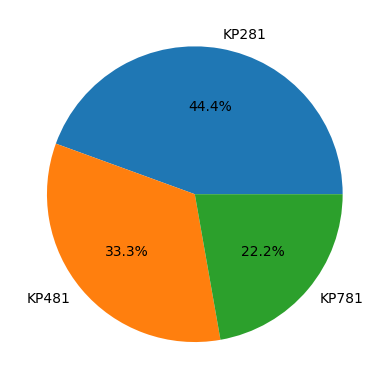

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


In [32]:
plt.pie(df["Product"].value_counts(),  labels=df["Product"].value_counts().index, autopct='%1.1f%%')
plt.show()
print(df["Product"].value_counts())

Insights: Pie chart shows KP281 product is bought by 44.4% people followed by KP481 which is 33.3% and only 22.2% people bought KP781

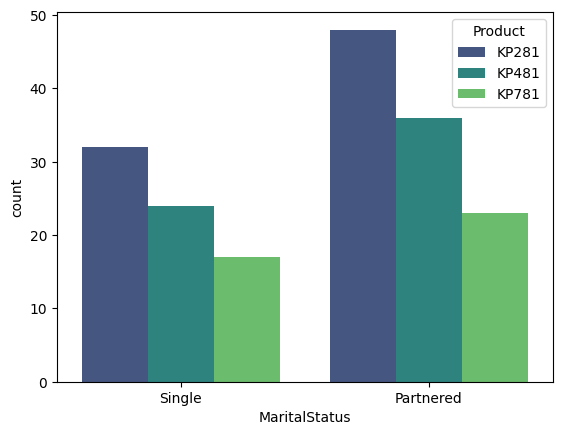

MaritalStatus
Partnered    107
Single        73
Name: Product, dtype: int64


In [33]:
# Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
sns.countplot(x = "MaritalStatus", data = df, hue = "Product", palette= "viridis")
plt.show()
print(df.groupby(df["MaritalStatus"])["Product"].count())

Insights: There is no significant differance in purchase of product based on their marital status.

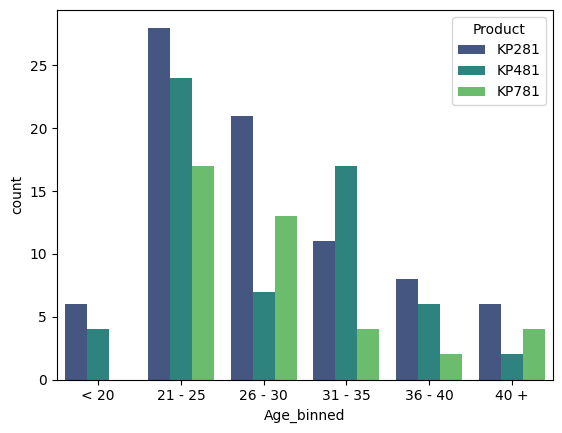

Age_binned
< 20       10
21 - 25    69
26 - 30    41
31 - 35    32
36 - 40    16
40 +       12
Name: Product, dtype: int64


In [34]:
sns.countplot(x = "Age_binned", data = df, hue = "Product", palette= "viridis")
plt.show()
print(df.groupby(df["Age_binned"])["Product"].count())

Insights: For People with age 21-25 KP281 is more preferred followed by KP481 and KP781.
For People with age 26-30 KP281 is more preferred followed by KP781 and KP481.
For People with age 31-35 KP481 is more preferred followed by KP281 and KP781.

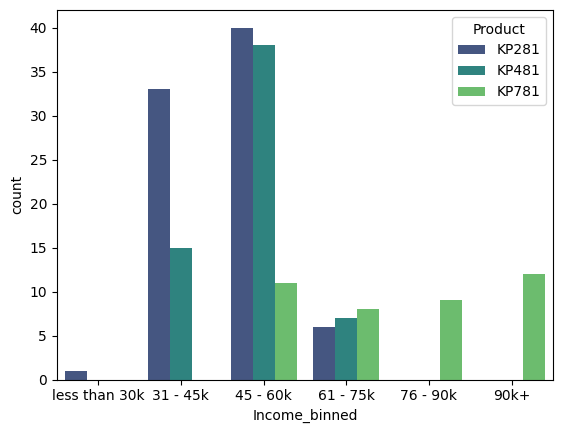

Income_binned
less than 30k     1
31 - 45k         48
45 - 60k         89
61 - 75k         21
76 - 90k          9
90k+             12
Name: Product, dtype: int64


In [35]:
sns.countplot(x = "Income_binned", data = df, hue = "Product", palette= "viridis")
plt.show()
print(df.groupby(df["Income_binned"])["Product"].count())

Insights: It is noticed that people whoso income less than 45k did not bought KP781 product. KP281 is sold more for people with income less than 45 followed by KP481.

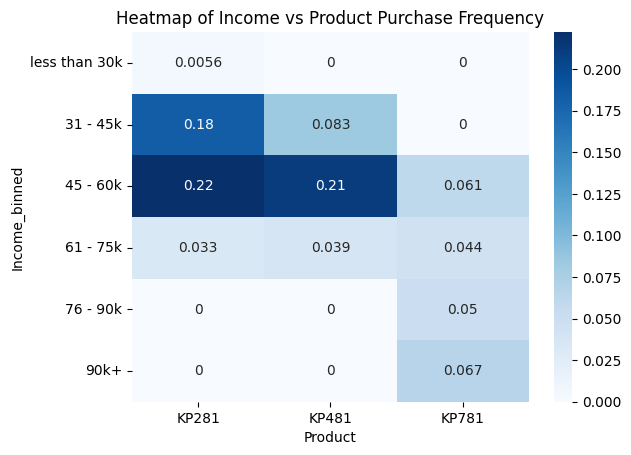

In [36]:
# Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

# Check correlation among different factors using heat maps or pair plots.
crosstab_result = pd.crosstab(df["Income_binned"], df["Product"], normalize = True)
sns.heatmap(crosstab_result, annot=True, cmap='Blues')
plt.title('Heatmap of Income vs Product Purchase Frequency')
plt.show()


Insights: Above heatmap shows

22% people having income between 45-60k bought KP281.

21% people having income between 45-60k bought KP481.

6% people having income between 45-60k bought KP781.

------------------------------------------------------------------

3.3% people having income between 61-75k bought KP281.

3.9% people having income between 61-75k bought KP481.

4.4% people having income between 61-75k bought KP781.

------------------------------------------------------------------

All people with income more than 75k bought KP781.

All people with income less than 45k bought either KP281 or KP481.

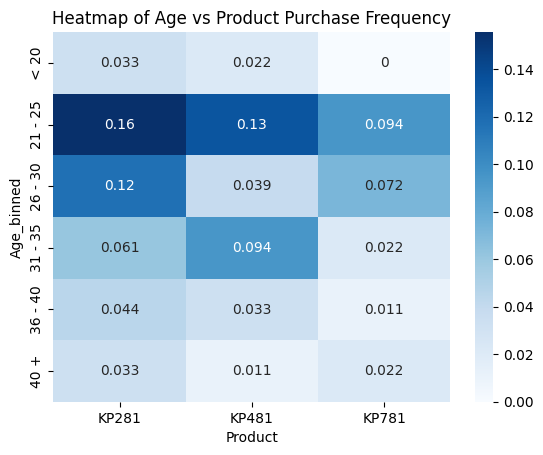

In [37]:
crosstab_result = pd.crosstab(df["Age_binned"], df["Product"], normalize = True)
sns.heatmap(crosstab_result, annot=True, cmap='Blues')
plt.title('Heatmap of Age vs Product Purchase Frequency')
plt.show()


Insights: Above Heatmap shows

People age between 21-25 16% of those bought KP281
People age between 21-25 13% of those bought KP481
People age between 21-25 9% of those bought KP781



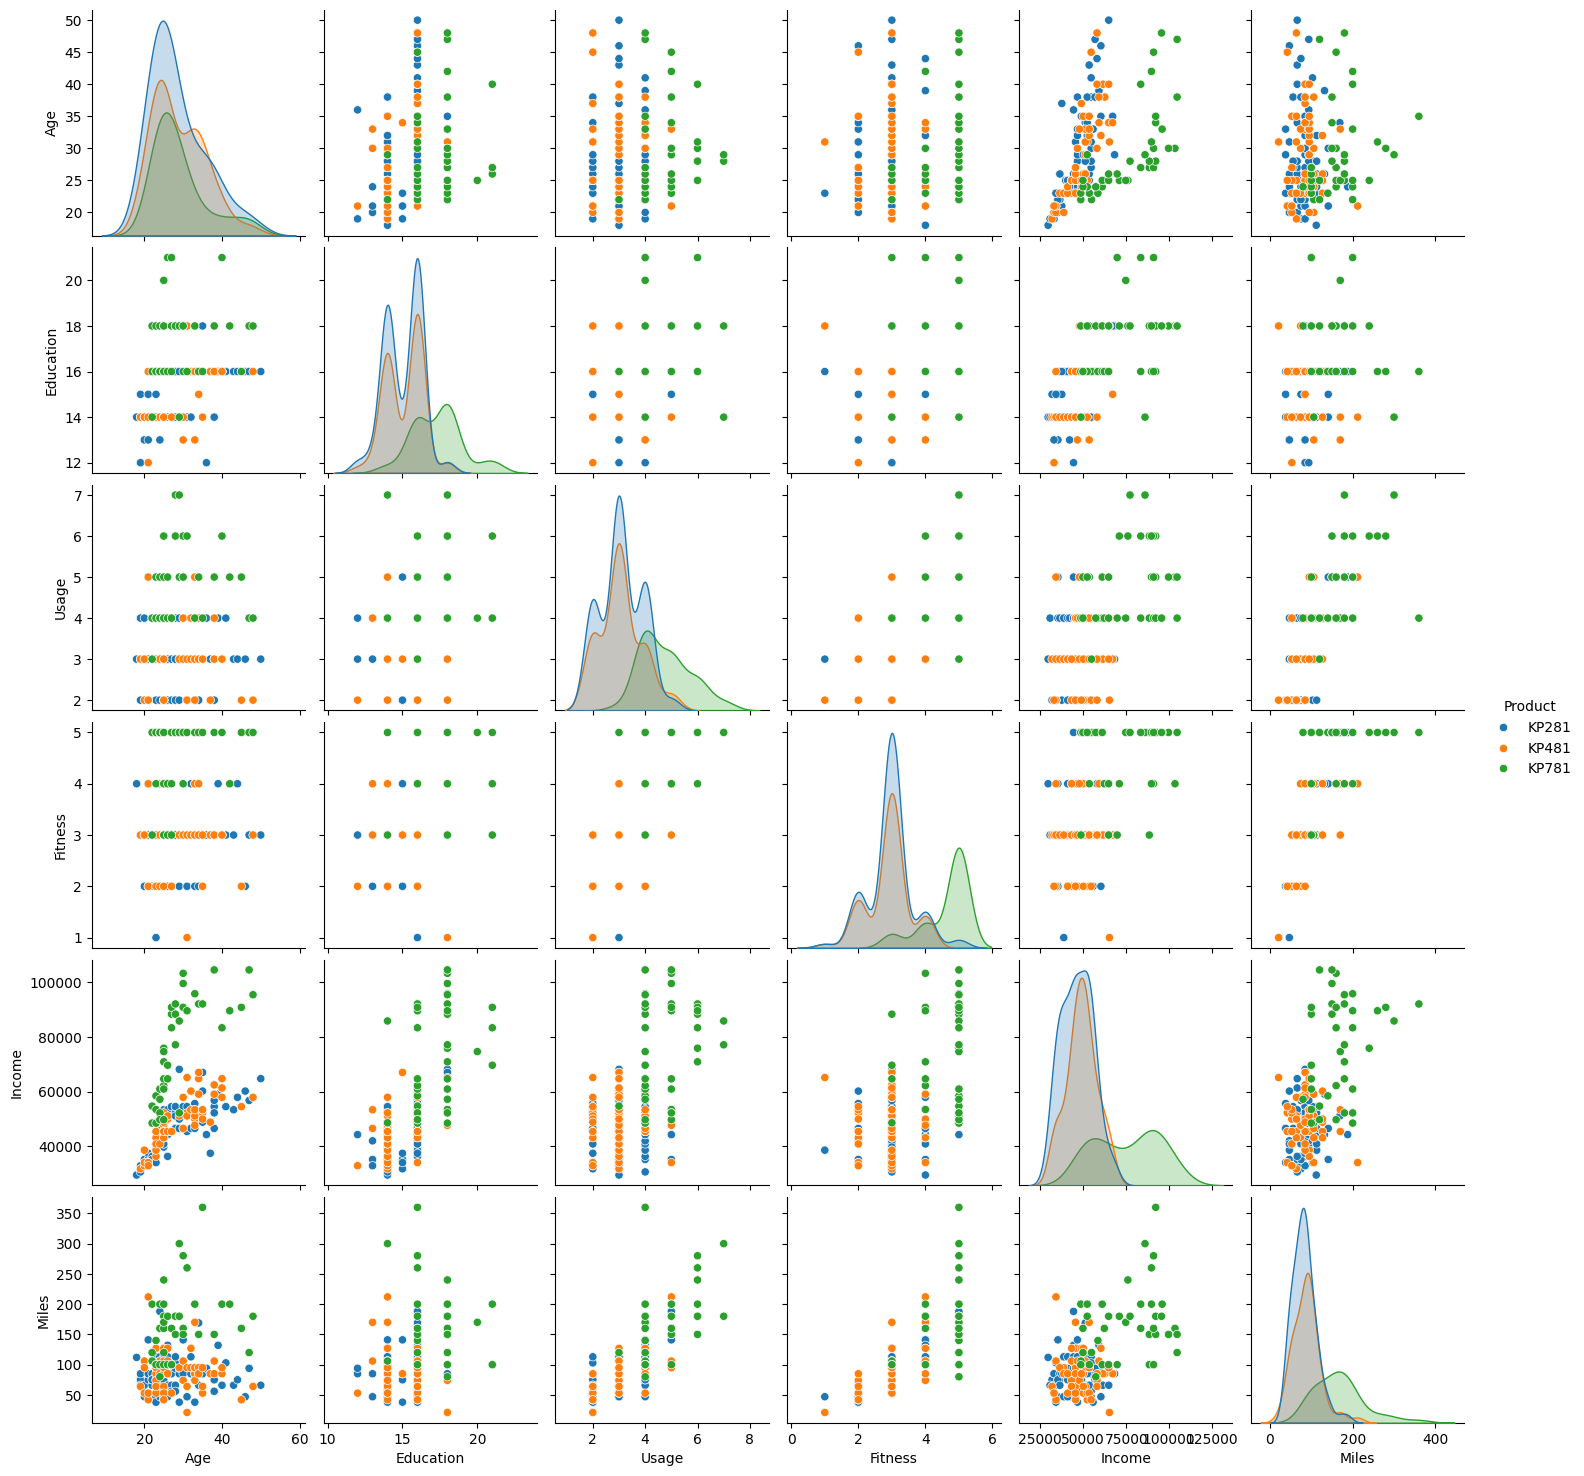

In [38]:
# pair plots
sns.pairplot(df, hue='Product', diag_kind='kde')
plt.show()

Insights: above pairplot show Income, Fiteness score, Usage per week, Miles run per week are the most important feature in selection of product purchase.

Higher the Income, fitness score, miles runned KP781 is preffered.
Lower the Income and miles runned KP281 is preffered.

Text(0.5, 1.0, 'Scatterplot of Age and income for each product')

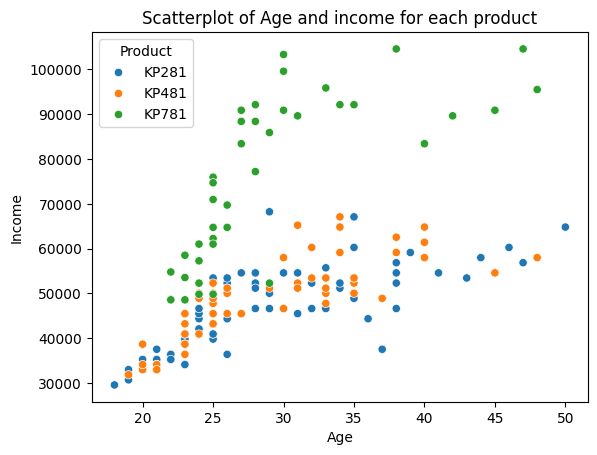

In [39]:
sns.scatterplot(data = df, x = "Age", y = "Income", hue = "Product")
plt.title("Scatterplot of Age and income for each product")

1. Above graph suggests that people of age 23 to 30 having income above 50k preferred KP781 product.

2. Other people regard less of their age prefer KP281 or KP481

Text(0.5, 1.0, 'Barplot of Age and income for each product')

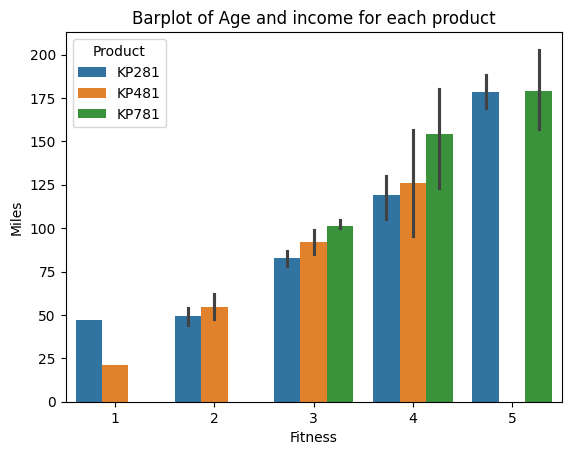

In [40]:
sns.barplot(data = df, x = "Fitness", y = "Miles", hue = "Product")
plt.title("Barplot of Age and income for each product")

People Who has fitness score as 5 preffers KP781.


To calculate what are the conditional probabilities of buying a perticular product given the fitness score we can use Cross tab function.

In [41]:
ct1 = pd.crosstab(df["Product"], df["Fitness"])
ct1

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


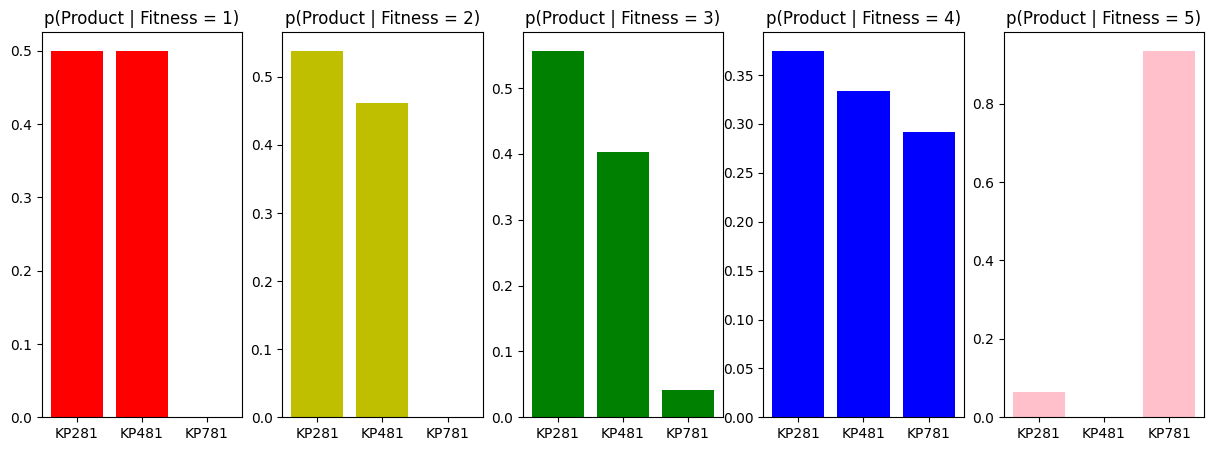

In [42]:
# to calculate conditional probability based on fitness
f1 = ct1.loc[:,1]/ct1.loc[:,1].sum()
f2 = ct1.loc[:,2]/ct1.loc[:,2].sum()
f3 = ct1.loc[:,3]/ct1.loc[:,3].sum()
f4 = ct1.loc[:,4]/ct1.loc[:,4].sum()
f5 = ct1.loc[:,5]/ct1.loc[:,5].sum()

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].bar(f1.index, f1.values, color = "r")
axs[0].set_title('p(Product | Fitness = 1)')

axs[1].bar(f2.index, f2.values, color = "y")
axs[1].set_title('p(Product | Fitness = 2)')

axs[2].bar(f3.index, f3.values, color = "g")
axs[2].set_title('p(Product | Fitness = 3)')

axs[3].bar(f4.index, f4.values, color = 'b')
axs[3].set_title('p(Product | Fitness = 4)')

axs[4].bar(f5.index, f5.values, color = "pink")
axs[4].set_title('p(Product | Fitness = 5)')

plt.show()

People who rated fitness score 5 prefer KP781

People who rated fitness score 1 to 3 prefer KP281 or KP481

Note: People who rated fiteness score 4 purchase either of any product to get more perticular we can filter the Income of people with fitness = 4 and calculate probability of buying which product is more.

In [43]:
print(f"probability of indivisual buying KP281, KP481 and KP781 given that his fitness score 5", f5*100)

probability of indivisual buying KP281, KP481 and KP781 given that his fitness score 5 Product
KP281     6.451613
KP481     0.000000
KP781    93.548387
Name: 5, dtype: float64


To calculate what are the probabilities of buying a perticular product given the Usage per week.

In [44]:
ct2 = pd.crosstab(df["Product"], df["Usage"])
ct2

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,19,37,22,2,0,0
KP481,14,31,12,3,0,0
KP781,0,1,18,12,7,2


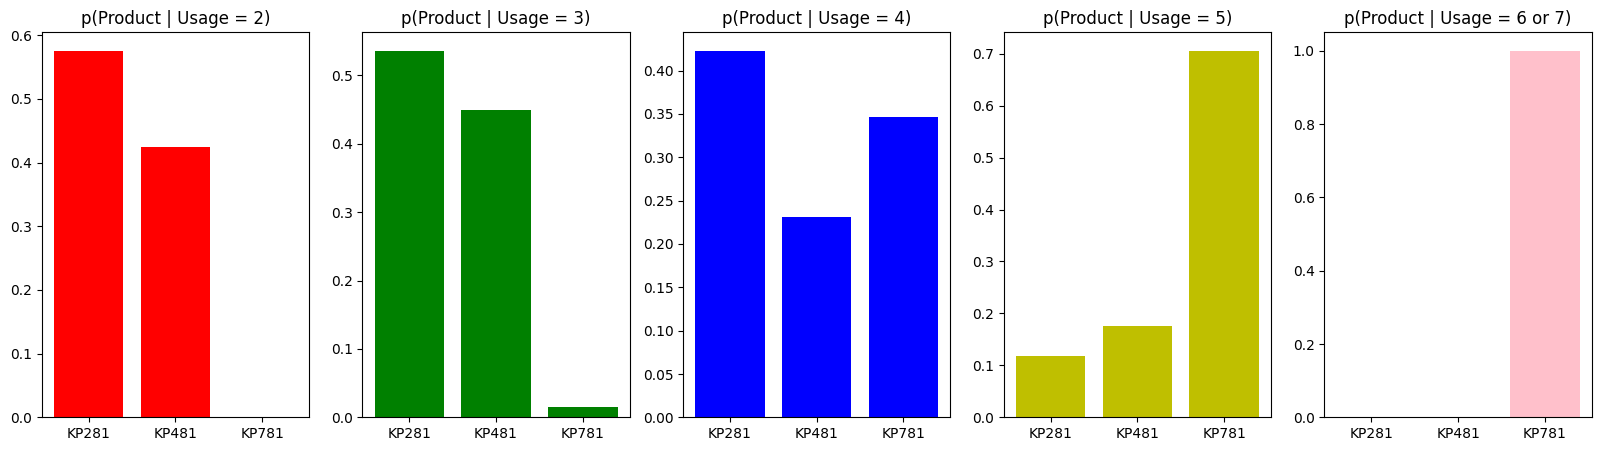

In [45]:
U1 = ct2.loc[:,2]/ct2.loc[:,2].sum()
U2 = ct2.loc[:,3]/ct2.loc[:,3].sum()
U3 = ct2.loc[:,4]/ct2.loc[:,4].sum()
U4 = ct2.loc[:,5]/ct2.loc[:,5].sum()
U6 = (ct2.loc[:, 6] + ct2.loc[:, 7]) / (ct2.loc[:, 6] + ct2.loc[:, 7]).sum()

fig, axs = plt.subplots(1, 5, figsize=(20, 5))


axs[0].bar(U1.index, U1.values, color = "r")
axs[0].set_title('p(Product | Usage = 2)')

axs[1].bar(U2.index, U2.values, color = "g")
axs[1].set_title('p(Product | Usage = 3)')

axs[2].bar(U3.index, U3.values, color = "b")
axs[2].set_title('p(Product | Usage = 4)')

axs[3].bar(U4.index, U4.values, color = "y")
axs[3].set_title('p(Product | Usage = 5)')

axs[4].bar(U6.index, U6.values, color = "pink")
axs[4].set_title('p(Product | Usage = 6 or 7)')

plt.show()


Insights:

Based on the usage per week probability of people buying KP781 given that Usage per week greater than 5 is 100%.

probability of people buying KP781 given that Usage per week less than 2 is 0%.

70% peoper prefer buying KP781 whose usage per week is 5.



Conditional probability based on income.

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'KP281'), Text(0, 1.5, 'KP481'), Text(0, 2.5, 'KP781')])

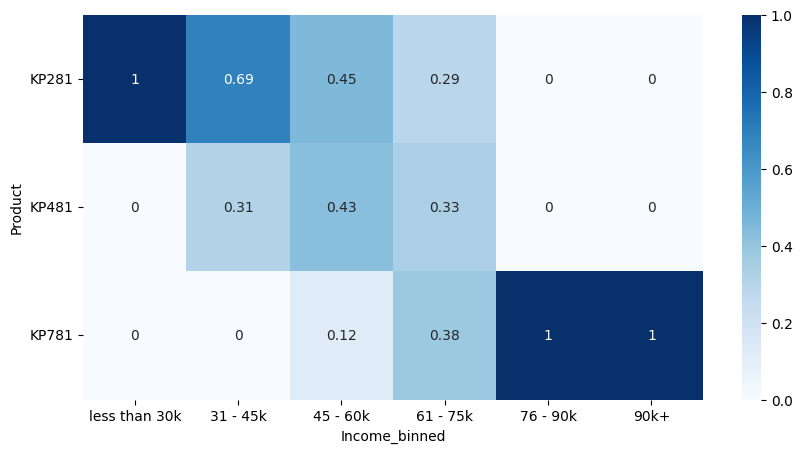

In [46]:
ct3 = pd.crosstab(df["Product"], df["Income_binned"])/pd.crosstab(df["Product"], df["Income_binned"]).sum()
plt.figure(figsize = (10, 5))
sns.heatmap(ct3, annot = True, cmap = 'Blues')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

1. Probabilily of people buying KP281 given the income is less than 30k is 100% (means people with less income than 30k do not preffer KP481 or KP781)
2. Probabilily of people buying KP281 given the income between 31k to 45k is 69%
3. Probabilily of people buying KP481 given the income between 31k to 45k is 31%


4. For income between 45k to 60k probablily of people buying KP281 is 45%
5. For income between 45k to 60k probablily of people buying KP481 is 43%
6. For income between 45k to 60k probablily of people buying KP781 is 12%

7. For income between 61k to 75k probablily of people buying KP281 is 29%
8. For income between 61k to 75k probablily of people buying KP481 is 33%
9. For income between 61k to 75k probablily of people buying KP781 is 38%

10. Indivisual with Income more than 75k probablily of buying KP781 is 100%
(means people with income more than 75k preffer buying only KP781)

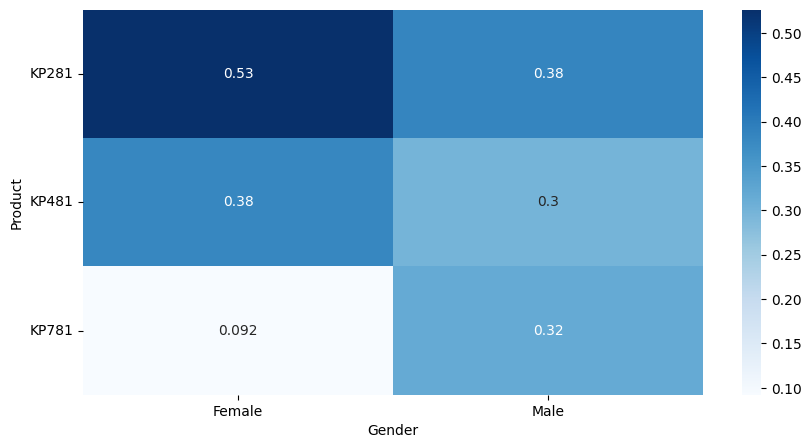

In [47]:
ct4 = pd.crosstab(df["Product"], df["Gender"])/pd.crosstab(df["Product"], df["Gender"]).sum()
plt.figure(figsize = (10, 5))
sns.heatmap(ct4, annot = True, cmap = 'Blues')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()

Insights: Above heatmap show probabilities of People buying product given their Gender.

It is seen that 53% Female Choose to buy KP281
and very few females choos to buy KP781 9% only. KP481 38%.

Male There is no significant difference compared to female in male for purchase of any of the product.

probability of male customer buying KP281 is 38%

probability of male customer buying KP481 is 30%

probability of male customer buying KP781 is 32%.

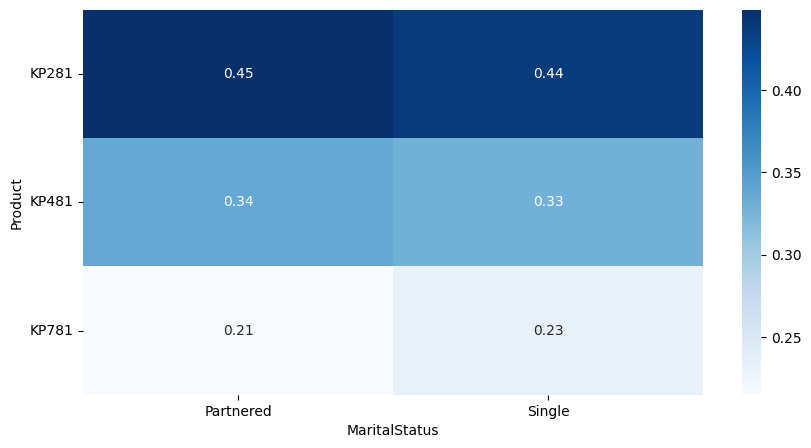

In [48]:
ct5 = pd.crosstab(df["Product"], df["MaritalStatus"])/pd.crosstab(df["Product"], df["MaritalStatus"]).sum()
plt.figure(figsize = (10, 5))
sns.heatmap(ct5, annot = True, cmap = 'Blues')
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.show()

Insights: Marital status and Product chioce is independent of each other

Summary of Insights:

Income Distribution and Product Preference:

Majority of customers fall in the middle-income range, preferring KP281 and KP481 models, while higher-income individuals show a preference for the premium KP781 model.

.

Usage Frequency and Product Preference:

Customers planning to use treadmills more frequently tend to prefer the KP781 model, indicating it may be favored by serious fitness enthusiasts or athletes.

.

Fitness Score and Product Preference:

Higher fitness scores correlate with a preference for the KP781 model, suggesting it's popular among those with advanced fitness levels or specific training needs.

.

Age and Income Segmentation:

Younger individuals with higher incomes prefer the KP781 model, while others lean towards KP281 or KP481, regardless of age.

.

Gender-Based Preferences:

Females prefer the KP281 model more than males, while males show relatively even preferences across models, indicating potential gender-specific marketing strategies.

.

Marital Status Influence:

Marital status does not significantly influence product preferences, suggesting other demographic and behavioral factors are more relevant.

.


**Actionable recommendations**

**Tailored Marketing Campaigns:**

For High Earners: Focus advertising on the KP781 treadmill in platforms and areas frequented by high-income individuals, emphasizing its superior features and suitability for serious athletes.

For Budget-Conscious Customers: Promote the KP281 and KP481 models in cost-effective mediums, highlighting their value and quality at a lower price point.


**Feature Highlights in Advertising:**

For Fitness Enthusiasts: Emphasize the advanced technology and durability of the KP781 in marketing materials.

For Casual Users: Highlight the ease of use and compact design of the KP281 and KP481 models.

**Community Engagement:**

Fitness Challenges: Sponsor local fitness events or online challenges that encourage people to engage with the brand and try different treadmill models.

Workshops and Demos: Host events where potential customers can try out treadmills and ask questions about their features and benefits.

**Enhanced Customer Service:**

Installation and Setup Help: Offer free or discounted installation services, especially for the premium KP781 model, to enhance customer satisfaction.

Responsive Support: Ensure customer service is easily accessible via phone, email, and social media to assist with any queries or issues.

**Feedback and Reviews:**

Encourage Reviews: Motivate customers to leave reviews by offering a small discount on future purchases. Positive reviews can help persuade new customers.
Act on Feedback: Regularly review customer feedback to identify areas for improvement in products and services.

**Inclusive Marketing:**

Gender-Neutral Campaigns: Since preferences vary significantly by gender, ensure that marketing materials speak to both male and female audiences effectively, without stereotyping.

Diverse Models: Use models of different ages, fitness levels, and backgrounds in promotional materials to appeal to a broader demographic.

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


In [50]:
!jupyter nbconvert --to pdf /content/Aerofit_Case_Study.ipynb


[NbConvertApp] WARNING | pattern '/content/Aerofit_Case_Study.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru